In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import fastf1 as ff1
from fastf1.core import Laps
from fastf1 import utils
from fastf1 import plotting
plotting.setup_mpl()
from timple.timedelta import strftimedelta

In [19]:
ff1.Cache.enable_cache('C:\code\python/2022_season_analysis_CODES')

QUALIFYING


In [20]:
emi_quali = ff1.get_session(2022, 'Emilia Romagna', 'Q')
print(emi_quali.date)

2022-04-22 17:00:00


In [21]:
emi_quali.load();
emi_quali_laps = emi_quali.laps

core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1240: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1240: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1240: FutureWarning: The frame.append method is deprecated and will be remov

In [22]:
emi_quali.results[:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,0.0,0 days 00:01:19.295000,0 days 00:01:18.793000,0 days 00:01:27.999000,NaT,,0.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,2.0,0.0,0 days 00:01:18.796000,0 days 00:01:19.584000,0 days 00:01:28.778000,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,3.0,0.0,0 days 00:01:20.168000,0 days 00:01:19.294000,0 days 00:01:29.131000,NaT,,0.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,4.0,0.0,0 days 00:01:20.147000,0 days 00:01:19.902000,0 days 00:01:29.164000,NaT,,0.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,5.0,0.0,0 days 00:01:20.198000,0 days 00:01:19.595000,0 days 00:01:29.202000,NaT,,0.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,6.0,0.0,0 days 00:01:19.980000,0 days 00:01:20.031000,0 days 00:01:29.742000,NaT,,0.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,7.0,0.0,0 days 00:01:19.773000,0 days 00:01:19.296000,0 days 00:01:29.808000,NaT,,0.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,8.0,0.0,0 days 00:01:20.419000,0 days 00:01:20.192000,0 days 00:01:30.439000,NaT,,0.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,9.0,0.0,0 days 00:01:20.364000,0 days 00:01:19.957000,0 days 00:01:31.062000,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,10.0,0.0,0 days 00:01:19.305000,0 days 00:01:18.990000,NaT,NaT,,0.0


In [23]:
fastest_quali_lap = emi_quali_laps.pick_fastest()
fastest_quali_lap

Time                      0 days 00:50:20.635000
DriverNumber                                  55
LapTime                   0 days 00:01:18.990000
LapNumber                                     12
Stint                                          3
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:25.794000
Sector2Time               0 days 00:00:26.930000
Sector3Time               0 days 00:00:26.266000
Sector1SessionTime        0 days 00:49:27.439000
Sector2SessionTime        0 days 00:49:54.369000
Sector3SessionTime        0 days 00:50:20.635000
SpeedI1                                    222.0
SpeedI2                                    257.0
SpeedFL                                    276.0
SpeedST                                    293.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre           

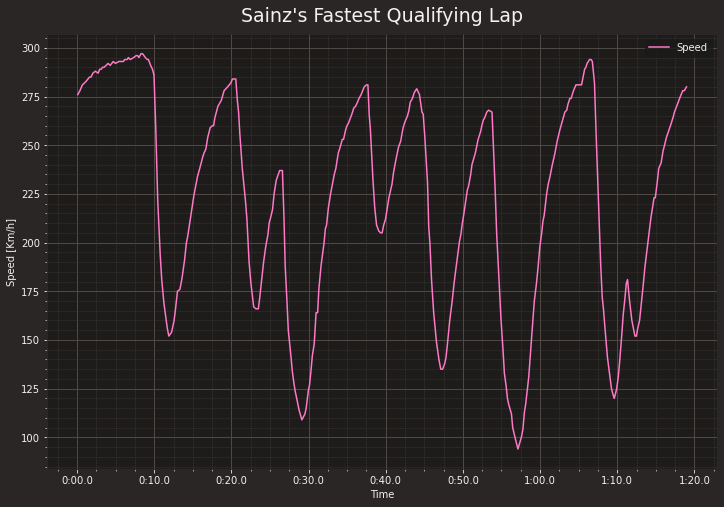

In [24]:
sai_fastest_quali_lap = emi_quali_laps.pick_driver('SAI').pick_fastest()
sai_car_data = sai_fastest_quali_lap.get_car_data()
t = sai_car_data['Time']
velo = sai_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velo, label='Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Sainz's Fastest Qualifying Lap")
ax.legend()

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:2082: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


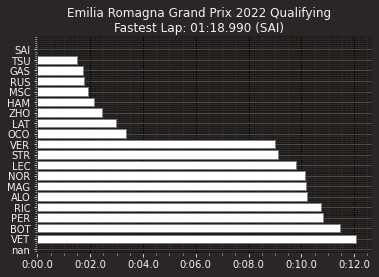

In [25]:
drivers = pd.unique(emi_quali.laps['Driver'])
#print(drivers)

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = emi_quali.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color='white', edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

ax.invert_yaxis()

ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{emi_quali.event['EventName']} {emi_quali.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1240: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1240: FutureWarning: The frame.append method is deprecated and will be removed from pa

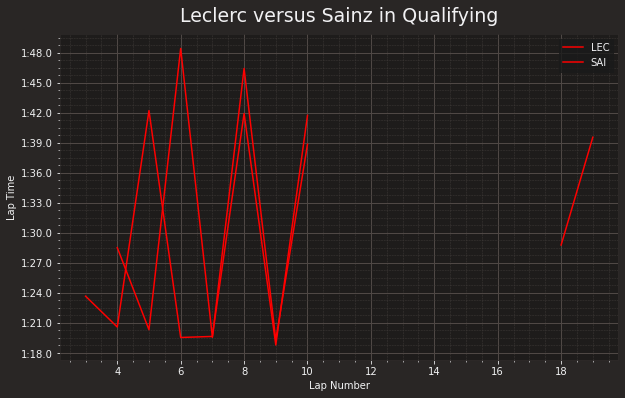

In [26]:
laps = emi_quali.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('SAI')
drv_2 = laps.pick_driver('LEC')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='red')
ax.plot(drv_2 ['LapNumber'], drv_2 ['LapTime'], color='red')
ax.set_title('Leclerc versus Sainz in Qualifying')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['LEC', 'SAI'])

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1240: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_last).reset_index(drop=True)
c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1240: FutureWarning: The frame.append method is deprecated and will be removed from pa

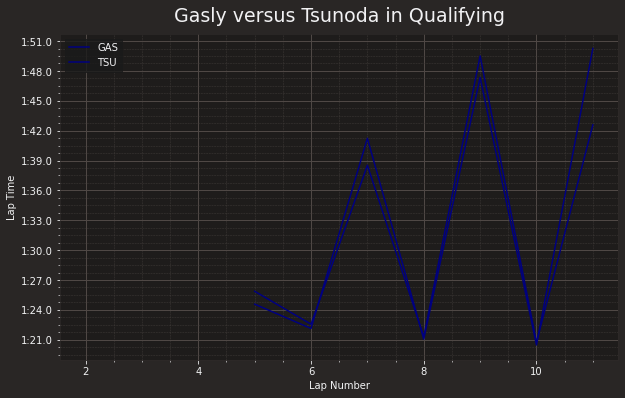

In [27]:
laps = emi_quali.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('GAS')
drv_2 = laps.pick_driver('TSU')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='navy')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='navy')
ax.set_title('Gasly versus Tsunoda in Qualifying')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['GAS', 'TSU'])

RACE

In [28]:
emi_race = ff1.get_session(2022, 'Emilia Romagna', 'R')
print(emi_race.date)

2022-04-24 15:00:00


In [29]:
emi_race.load();
emi_race_laps = emi_race.laps
emi_race_laps

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '63', '77', '16', '22', '5', '20', '18', '23', '10', '44', '31', '24', '6', '47', '3', '14', '55']


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:54.806000,1,NaT,1.0,1.0,0 days 00:25:08.250000,NaT,NaT,0 days 00:00:31.809000,0 days 00:00:46.739000,...,False,INTERMEDIATE,1.0,True,0 days 01:02:03.225000,Red Bull Racing,VER,24,False,2022-04-24 13:03:03.238
1,0 days 01:06:20.801000,1,0 days 00:02:25.995000,2.0,1.0,NaT,NaT,0 days 00:00:54.085000,0 days 00:00:47.410000,0 days 00:00:44.500000,...,False,INTERMEDIATE,2.0,True,0 days 01:03:54.806000,Red Bull Racing,VER,4,False,2022-04-24 13:04:54.819
2,0 days 01:08:37.301000,1,0 days 00:02:16.500000,3.0,1.0,NaT,NaT,0 days 00:00:45.833000,0 days 00:00:46.168000,0 days 00:00:44.499000,...,False,INTERMEDIATE,3.0,True,0 days 01:06:20.801000,Red Bull Racing,VER,4,False,2022-04-24 13:07:20.814
3,0 days 01:11:04.728000,1,0 days 00:02:27.427000,4.0,1.0,NaT,NaT,0 days 00:00:42.546000,0 days 00:00:48.335000,0 days 00:00:56.546000,...,False,INTERMEDIATE,4.0,True,0 days 01:08:37.301000,Red Bull Racing,VER,4,False,2022-04-24 13:09:37.314
4,0 days 01:12:36.178000,1,0 days 00:01:31.450000,5.0,1.0,NaT,NaT,0 days 00:00:29.619000,0 days 00:00:30.801000,0 days 00:00:31.030000,...,False,INTERMEDIATE,5.0,True,0 days 01:11:04.728000,Red Bull Racing,VER,1,False,2022-04-24 13:12:04.741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,0 days 01:08:51.524000,14,0 days 00:02:19.044000,3.0,1.0,NaT,NaT,0 days 00:00:44.840000,0 days 00:00:45.662000,0 days 00:00:48.542000,...,False,INTERMEDIATE,3.0,True,0 days 01:06:32.480000,Alpine,ALO,4,False,2022-04-24 13:07:32.493
1128,0 days 01:11:08.492000,14,0 days 00:02:16.968000,4.0,1.0,NaT,NaT,0 days 00:00:38.330000,0 days 00:00:45.836000,0 days 00:00:52.802000,...,False,INTERMEDIATE,4.0,True,0 days 01:08:51.524000,Alpine,ALO,4,False,2022-04-24 13:09:51.537
1129,0 days 01:12:48.177000,14,0 days 00:01:39.685000,5.0,1.0,NaT,NaT,0 days 00:00:32.192000,0 days 00:00:34.053000,0 days 00:00:33.440000,...,True,INTERMEDIATE,5.0,True,0 days 01:11:08.492000,Alpine,ALO,1,False,2022-04-24 13:12:08.505
1130,0 days 01:14:28.422000,14,0 days 00:01:40.245000,6.0,1.0,NaT,0 days 01:14:23.967000,0 days 00:00:30.919000,0 days 00:00:32.115000,0 days 00:00:37.211000,...,False,INTERMEDIATE,6.0,True,0 days 01:12:48.177000,Alpine,ALO,1,False,2022-04-24 13:13:48.190


In [30]:
emi_race.results[:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 01:32:07.986000,Finished,26.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,3.0,NaT,NaT,NaT,0 days 01:32:24.513000,Finished,18.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,3.0,5.0,NaT,NaT,NaT,0 days 01:32:42.820000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,11.0,NaT,NaT,NaT,0 days 01:32:50.492000,Finished,12.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,5.0,7.0,NaT,NaT,NaT,0 days 01:32:51.167000,Finished,10.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,6.0,2.0,NaT,NaT,NaT,0 days 01:33:04.058000,Finished,8.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,7.0,12.0,NaT,NaT,NaT,0 days 01:33:09.096000,Finished,6.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,8.0,13.0,NaT,NaT,NaT,0 days 01:33:18.878000,Finished,4.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,9.0,8.0,NaT,NaT,NaT,0 days 01:33:23.246000,Finished,2.0
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,10.0,15.0,NaT,NaT,NaT,NaT,+1 Lap,1.0


In [31]:
fastest_race_lap = emi_race_laps.pick_fastest()
fastest_race_lap

Time                      0 days 02:23:32.653000
DriverNumber                                   1
LapTime                   0 days 00:01:18.446000
LapNumber                                   55.0
Stint                                        3.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:25.088000
Sector2Time               0 days 00:00:27.017000
Sector3Time               0 days 00:00:26.341000
Sector1SessionTime        0 days 02:22:39.295000
Sector2SessionTime        0 days 02:23:06.312000
Sector3SessionTime        0 days 02:23:32.653000
SpeedI1                                    222.0
SpeedI2                                    257.0
SpeedFL                                    279.0
SpeedST                                    294.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     4.0
FreshTyre           

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '63', '77', '16', '22', '5', '20', '18', '23', '10', '44', '31', '24', '6', '47', '3', '14', '55'

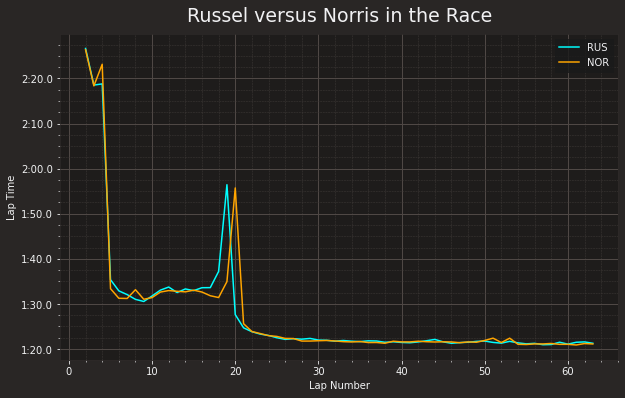

In [32]:
laps = emi_race.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('RUS')
drv_2 = laps.pick_driver('NOR')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='cyan')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='orange')
ax.set_title('Russel versus Norris in the Race')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['RUS', 'NOR'])

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '63', '77', '16', '22', '5', '20', '18', '23', '10', '44', '31', '24', '6', '47', '3', '14', '55'

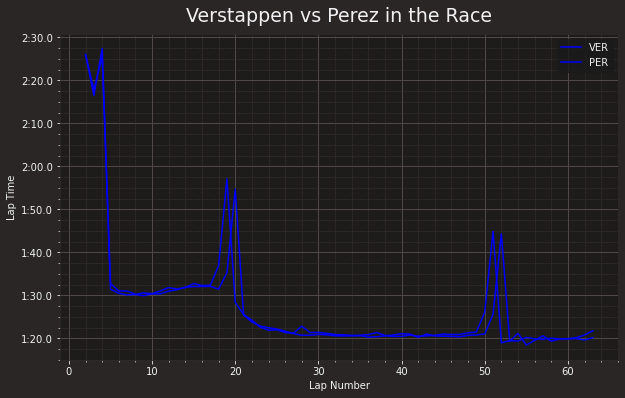

In [33]:
laps = emi_race.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('VER')
drv_2 = laps.pick_driver('PER')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='blue')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='blue')
ax.set_title('Verstappen vs Perez in the Race')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['VER', 'PER'])

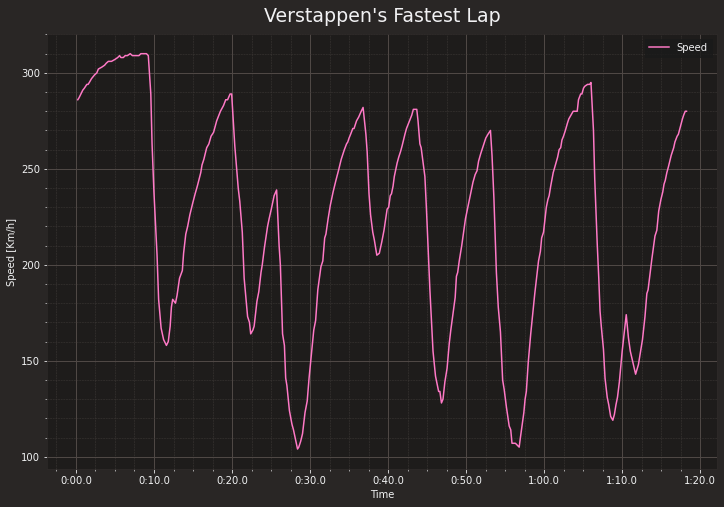

In [34]:
ver_fastest_lap = emi_race_laps.pick_driver('VER').pick_fastest()
ver_car_data = ver_fastest_lap.get_car_data()
t = ver_car_data['Time']
velo = ver_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velo, label='Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Verstappen's Fastest Lap")
ax.legend()